# Project description

This project is about analysing and prediction Weather Patterns

Project details:

Author: K.Santhosh

Date:12/3/2025

Version:1

problem statement:Analyse and predict weather pattern

# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import numpy as np


# Importing Dataset

In [ ]:
df=pd.read_csv("/content/weather_data.csv")

In [ ]:
print(df.columns)

Index(['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct',
       'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')


In [ ]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df = df.sort_values(by='Date_Time')

In [ ]:
df.set_index('Date_Time', inplace=True)
daily_avg_temp = df['Temperature_C'].resample('D').mean()

# Data Analysis

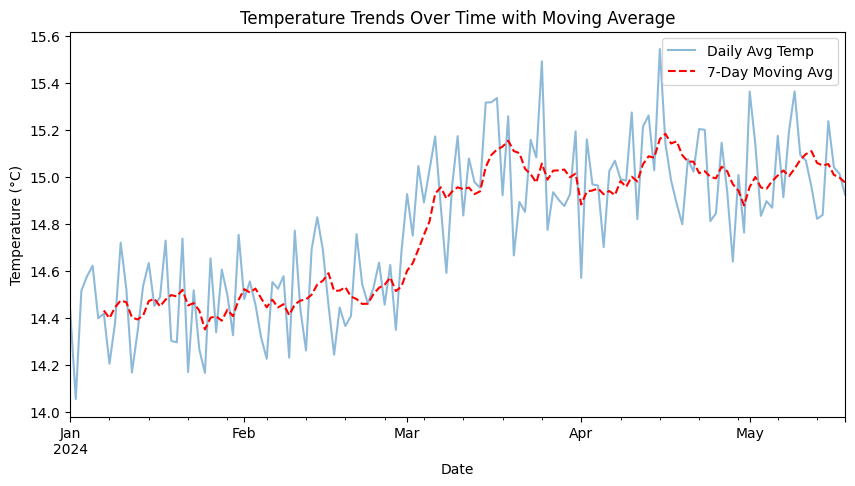

In [ ]:
plt.figure(figsize=(10, 5))
daily_avg_temp.plot(label='Daily Avg Temp', alpha=0.5)
daily_avg_temp.rolling(window=7).mean().plot(label='7-Day Moving Avg', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Time with Moving Average')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


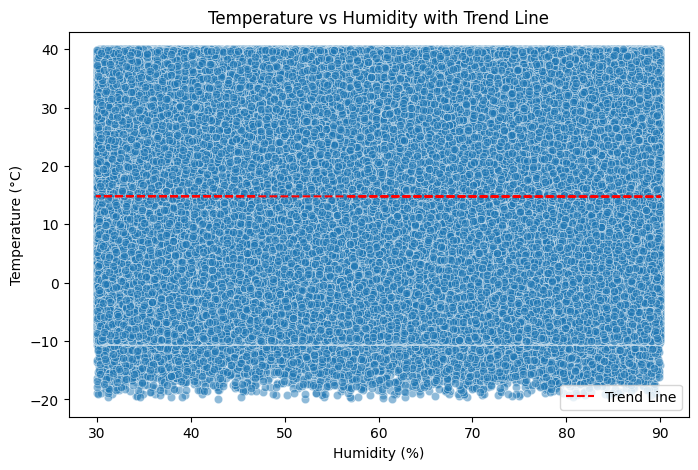

In [ ]:
from scipy.stats import linregress
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Humidity_pct'], y=df['Temperature_C'], alpha=0.5)
slope, intercept, _, _, _ = linregress(df['Humidity_pct'], df['Temperature_C'])
plt.plot(df['Humidity_pct'], slope * df['Humidity_pct'] + intercept, color='red', linestyle='dashed', label='Trend Line')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Humidity with Trend Line')
plt.legend()
plt.show()


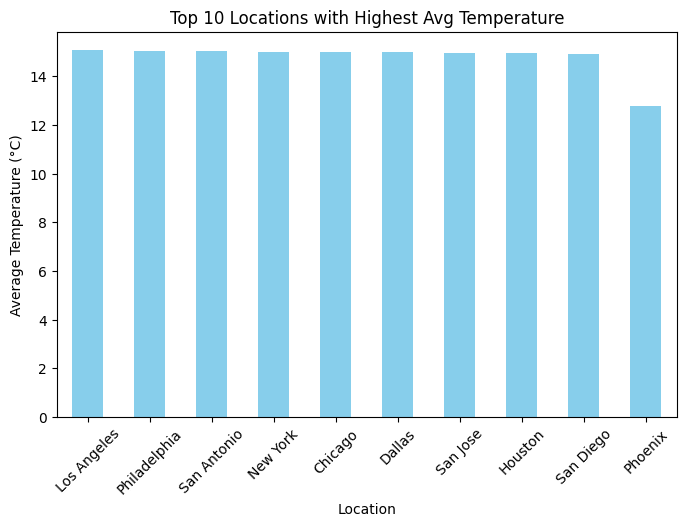

In [ ]:
avg_temp = df.groupby('Location')['Temperature_C'].mean().nlargest(10)  # Limit to top 10 locations
plt.figure(figsize=(8, 5))
avg_temp.plot(kind='bar', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Average Temperature (°C)')
plt.title('Top 10 Locations with Highest Avg Temperature')
plt.xticks(rotation=45)
plt.show()


In [ ]:
threshold = df['Temperature_C'].mean() + 3 * df['Temperature_C'].std()
anomalies = df[df['Temperature_C'] > threshold]
print("Extreme Temperature Anomalies:")
print(anomalies[['Date_Time', 'Location', 'Temperature_C']].head())

Extreme Temperature Anomalies:
Empty DataFrame
Columns: [Date_Time, Location, Temperature_C]
Index: []
